In [2]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Matplotlib is building the font cache; this may take a moment.


In [4]:
# data set path

path = r"/Users/martin/anaconda_projects/11-02-2025 Instacart Basket Analysis"

In [11]:
# import data set 

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 data' , 'Prepared Data' , 'ords_prods_merge_2.pkl'))

NameError: name 'pd' is not defined

## Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

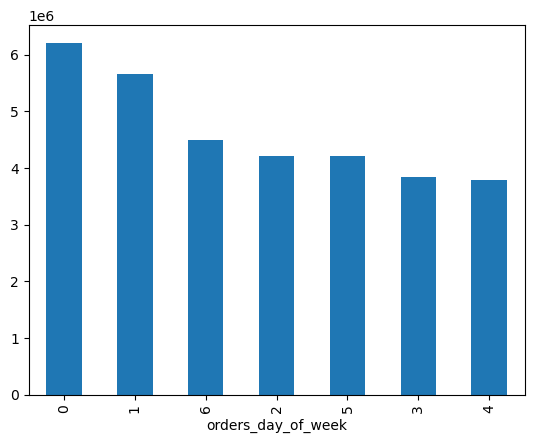

In [19]:
# by using function

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

In [9]:
# to sort the bars in your chart according to their index order use this function (rather than largest to smallest).

ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

NameError: name 'ords_prods_merge' is not defined

### ⏰ Order Distribution by Hour of the Day  

The histogram illustrates the frequency of orders placed throughout the day.  

#### 🔹 Key Observations:
- **The highest number of orders occur between 9 AM and 4 PM**, with a peak around **10 AM to 3 PM**.
- **Order volume gradually increases** in the morning hours and declines after the peak period.
- **The lowest order frequencies** are observed during the early morning (midnight to 6 AM) and late-night hours.

#### 🛍️ Possible Explanations:
- The peak in orders **aligns with standard working hours**, suggesting that customers may place orders during breaks or while at work.
- Early morning and late-night hours have **fewer orders**, likely due to people sleeping or being less engaged in grocery shopping.
- The **mid-morning to afternoon window** may represent the most active shopping time, possibly driven by meal planning and routine purchases.

#### 📈 Business Implications:
- Instacart could **optimize promotions and delivery slots** to match high-traffic hours.
- Marketing strategies could focus on **engaging customers during off-peak hours** to balance demand.
- Further segmentation could analyze **weekend vs. weekday trends** to refine promotional campaigns.

---
📌 **Conclusion:** The data suggests that most orders are placed during the late morning and early afternoon hours. Understanding customer behavior at different times of the day can help optimize operations and marketing strategies.


<Axes: xlabel='orders_day_of_week'>

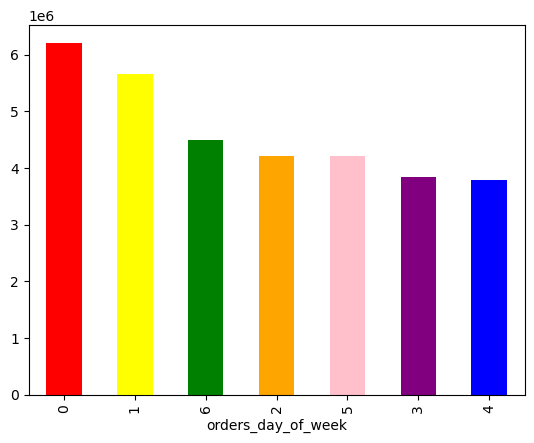

In [29]:
# adding some color

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['red', 'yellow', 'green', 'orange', 'pink', 'purple', 'blue'])

## Exporting Charts

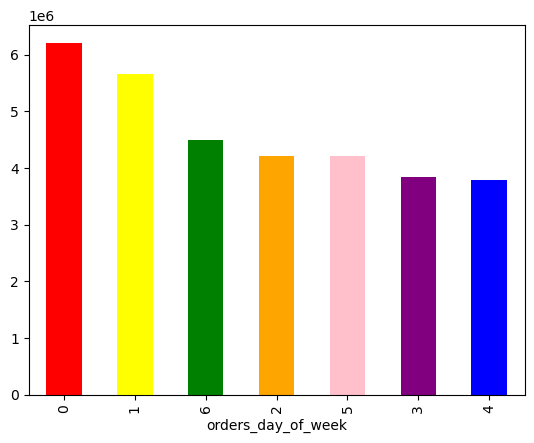

In [36]:
# to save the visualisation use this function:

bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['red', 'yellow', 'green', 'orange', 'pink', 'purple', 'blue'])

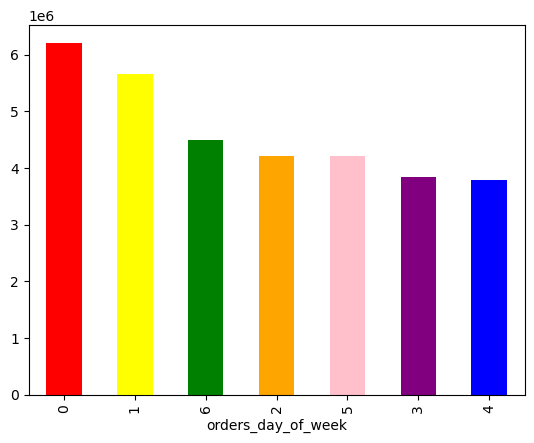

In [40]:
# you’ll be able to access it any time you like by this function:

bar.figure

In [6]:
# to export it outside of Jupyter in the form of an image file. This can be done via the figure.savefig() function:

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

NameError: name 'bar' is not defined

## Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

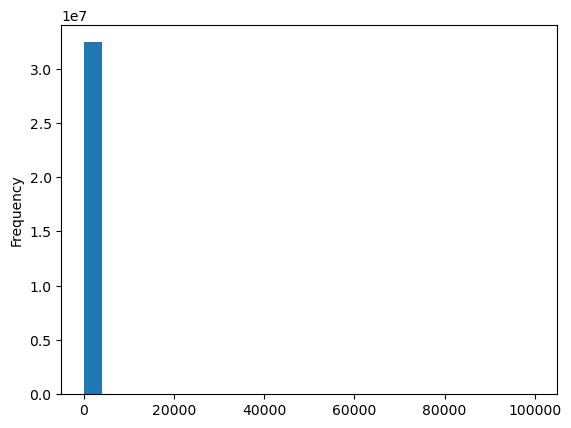

In [45]:
# creating a histogram of the “prices” column

ords_prods_merge['prices'].plot.hist(bins = 25)

In [49]:
# because the histogram looks strange let´s ran the describe() function against your “prices” column and produced the following output:

ords_prods_merge['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [61]:
# do you notice something odd in the maximum value? To further investigate, you could also conduct a few checks for each specific statistic:

ords_prods_merge['prices'].mean()

11.981143922966302

In [59]:
ords_prods_merge['prices'].median()

7.4

In [57]:
ords_prods_merge['prices'].max()

99999.0

In [65]:
# while the mean and median are between 7 and 12 (relatively realistic), the max value yields a strange result (maybe a outlier?).

<Axes: xlabel='prices', ylabel='prices'>

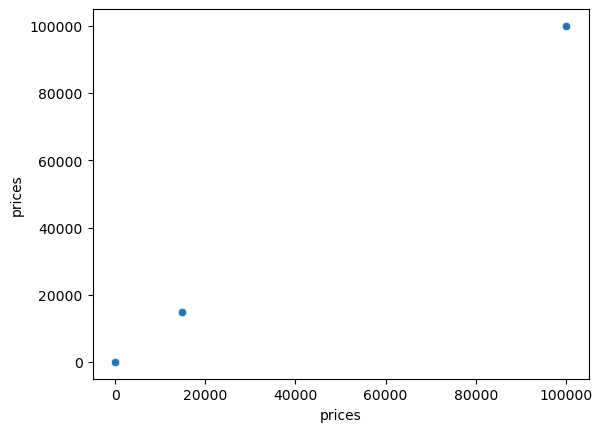

In [70]:
# a scatter plot can be used to visually identify potential outliers in the data using the following code:

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [72]:
# the mean (11.98) is located on the left), while the max (99999) is located on the right. But what about the value in the middle (close to 20000)?


In [88]:
# identifying outliers: Products with a price above 100 are considered extreme values

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_po,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,Busiest day,Busiest days,busiest_period_of_day
1576,171,912404,17,prior,12,2,14,5.0,21553,5,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Regularly busy,Regularly busy,Most orders
1638,181,603376,17,prior,22,6,16,4.0,21553,3,1,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Regularly busy,Regularly busy,Most orders
16532,1944,3264360,135,prior,2,2,21,13.0,21553,6,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Regularly busy,Regularly busy,Average orders
16538,1945,892534,135,prior,3,0,8,12.0,21553,3,1,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Busiest day,Busiest day,Average orders
53710,5708,229704,342,prior,8,1,19,30.0,21553,9,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Regularly busy,Busiest day,Average orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32349781,3411856,3172853,205650,prior,18,1,9,7.0,21553,17,1,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Regularly busy,Busiest day,Average orders
32377014,3414691,2504315,205818,prior,3,5,15,3.0,21553,13,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Regularly busy,Regularly busy,Most orders
32377024,3414693,1108388,205818,prior,5,4,5,1.0,21553,5,1,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Least busy,Slowest days,Fewest orders
32409856,3418470,1916142,206049,prior,1,2,17,NaN,21553,2,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Regularly busy,Regularly busy,Average orders


In [84]:
# result:  here you can see the $14,900.00, which corresponds to the second unexplainable point in the scatterplot

In [92]:
# this command replaces all prices above 100 with NaN, 
# which can be useful if values above 100 are considered outliers and should not be included in calculations.

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [96]:
# check whether the replacement was successful by running a max-value check on your “prices” column:

ords_prods_merge['prices'].max()

25.0

In [98]:
# Now that you’ve replaced all your outliers with missing values, your max value is a much more realistic price point of 25.

<Axes: ylabel='Frequency'>

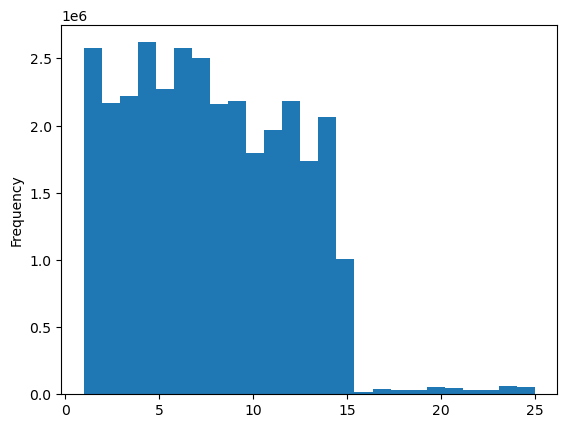

In [104]:
# Let´s try to create the histogram of the “prices” column again

ords_prods_merge['prices'].plot.hist(bins = 25)

In [106]:
# Your results make much more sense now: most products are between $1 and $15, while a few are higher priced at $15 to $25.

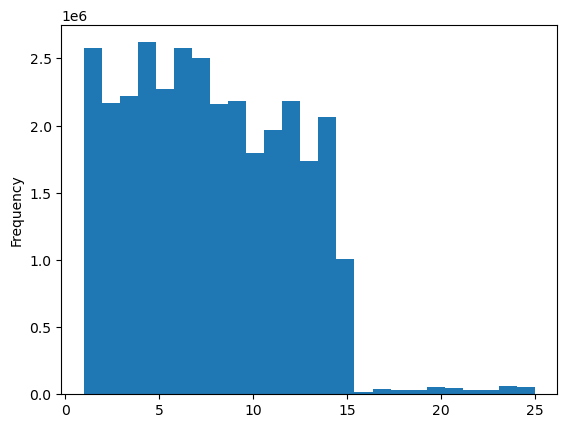

In [112]:
# to save the visualisation use this function:

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

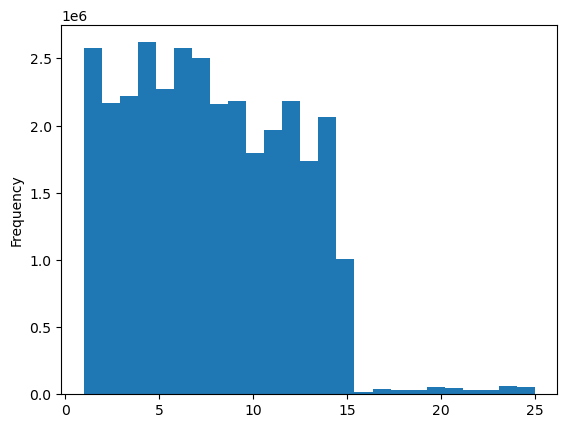

In [114]:
# you’ll be able to access it any time you like by this function:

hist.figure

### Exporting Charts

In [122]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_dow.png'))

## Sampling Data

In [135]:
# Create a list holding True/False values to the np.random.rant() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [145]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [147]:
# Store 30% of the samle in the dataframe small

small = ords_prods_merge[~dev]

In [159]:
# Check the exact number of rows in the whole dataframe

len(ords_prods_merge)

32434212

In [161]:
# Check if dataframe big & small combined are having the same amount of rows

len(big) + len(small)

32434212

In [163]:
# Result: The exact same number of rows!

In [167]:
# Next: reducing your samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.

df_2 = small[['orders_day_of_week','prices']]

## Creating Line Charts

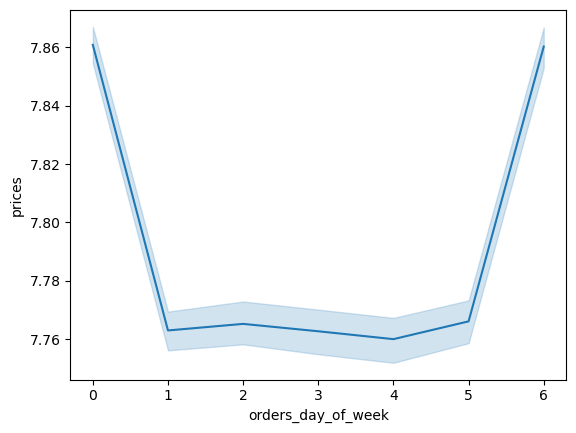

In [169]:
# Now, you’re finally ready to create your chart. Go ahead and execute the following code:

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

### Exporting Charts

In [173]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_prices_dow.png'))